In [1]:
import tensorflow as tf
import numpy as np
import math
import timeit
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# from cs231n.data_utils import load_CIFAR10

# def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000, num_dev=500):
#   """
#   Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
#   it for the linear classifier. These are the same steps as we used for the
#   SVM, but condensed to a single function.  
#   """
#   # Load the raw CIFAR-10 data
#   cifar10_dir = 
#   X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
  
#   # subsample the data
#   mask = range(num_training, num_training + num_validation)
#   X_val = X_train[mask]
#   y_val = y_train[mask]
#   mask = range(num_training)
#   X_train = X_train[mask]
#   y_train = y_train[mask]
#   mask = range(num_test)
#   X_test = X_test[mask]
#   y_test = y_test[mask]
#   mask = np.random.choice(num_training, num_dev, replace=False)
#   X_dev = X_train[mask]
#   y_dev = y_train[mask]
  
#   # Preprocessing: reshape the image data into rows
#   X_train = np.reshape(X_train, (X_train.shape[0], -1))
#   X_val = np.reshape(X_val, (X_val.shape[0], -1))
#   X_test = np.reshape(X_test, (X_test.shape[0], -1))
#   X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))
  
#   # Normalize the data: subtract the mean image
#   mean_image = np.mean(X_train, axis = 0)
#   X_train -= mean_image
#   X_val -= mean_image
#   X_test -= mean_image
#   X_dev -= mean_image
  
#   return X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev


# # Invoke the above function to get our data.
# X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev = get_CIFAR10_data()
# print ('Train data shape: ', X_train.shape)
# print ('Train labels shape: ', y_train.shape)
# print ('Validation data shape: ', X_val.shape)
# print ('Validation labels shape: ', y_val.shape)
# print ('Test data shape: ', X_test.shape)
# print ('Test labels shape: ', y_test.shape)
# print ('dev data shape: ', X_dev.shape)
# print ('dev labels shape: ', y_dev.shape)

from loadcifar10 import load_cifar10
x_tr, y_tr, x_te, y_te = load_cifar10('./cifar10/')

# standardize to N(0,1)
x_mean = np.mean(x_tr, axis = 0)
x_std = np.std(x_tr, axis = 0)

x_tr = (x_tr - x_mean)/ x_std
x_te = (x_te - x_mean)/ x_std


Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)
dev data shape:  (500, 3072)
dev labels shape:  (500,)


In [3]:
# clear old variables
tf.reset_default_graph()

# setup input (e.g. the data that changes every batch)
# The first dim is None, and gets sets automatically based on batch size fed in
X = tf.placeholder(tf.float32, [None, 3072])
y = tf.placeholder(tf.int64, [None])
is_training = tf.placeholder(tf.bool)

W = tf.Variable(tf.zeros([3072, 10]))
b = tf.Variable(tf.zeros([10]))

y_out = tf.nn.softmax(tf.matmul(X, W) + b)

xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=y_out, labels=y)
mean_loss = tf.reduce_mean(xentropy)

# define our optimizer
optimizer = tf.train.AdamOptimizer(5e-4) # select optimizer and set learning rate
train_step = optimizer.minimize(mean_loss)

Training
Iteration 0: with minibatch training loss = 2.3 and accuracy of 0.17
Iteration 100: with minibatch training loss = 2.22 and accuracy of 0.23
Iteration 200: with minibatch training loss = 2.15 and accuracy of 0.31
Iteration 300: with minibatch training loss = 2.24 and accuracy of 0.22
Iteration 400: with minibatch training loss = 2.13 and accuracy of 0.33
Iteration 500: with minibatch training loss = 2.16 and accuracy of 0.3
Iteration 600: with minibatch training loss = 2.23 and accuracy of 0.23
Iteration 700: with minibatch training loss = 2.13 and accuracy of 0.33
Epoch 1, Overall loss = 2.21 and accuracy of 0.248


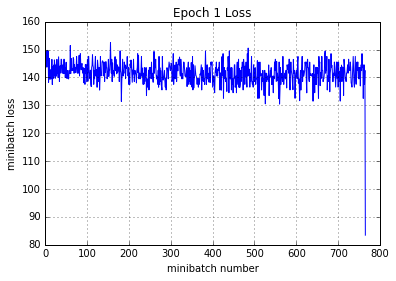

Iteration 800: with minibatch training loss = 2.23 and accuracy of 0.23
Iteration 900: with minibatch training loss = 2.18 and accuracy of 0.28
Iteration 1000: with minibatch training loss = 2.2 and accuracy of 0.27
Iteration 1100: with minibatch training loss = 2.2 and accuracy of 0.27
Iteration 1200: with minibatch training loss = 2.21 and accuracy of 0.25
Iteration 1300: with minibatch training loss = 2.21 and accuracy of 0.25
Iteration 1400: with minibatch training loss = 2.19 and accuracy of 0.28
Iteration 1500: with minibatch training loss = 2.14 and accuracy of 0.33
Epoch 2, Overall loss = 2.19 and accuracy of 0.268


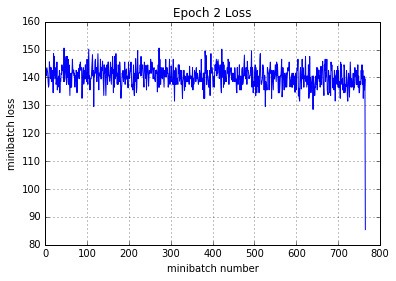

Iteration 1600: with minibatch training loss = 2.15 and accuracy of 0.31
Iteration 1700: with minibatch training loss = 2.21 and accuracy of 0.25
Iteration 1800: with minibatch training loss = 2.18 and accuracy of 0.28
Iteration 1900: with minibatch training loss = 2.12 and accuracy of 0.34
Iteration 2000: with minibatch training loss = 2.13 and accuracy of 0.33
Iteration 2100: with minibatch training loss = 2.24 and accuracy of 0.22
Iteration 2200: with minibatch training loss = 2.2 and accuracy of 0.27
Epoch 3, Overall loss = 2.17 and accuracy of 0.291


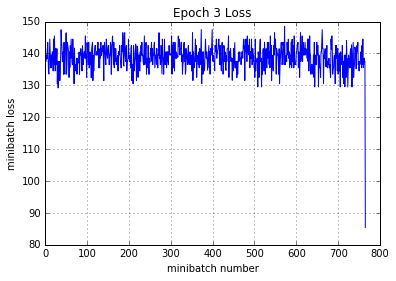

Iteration 2300: with minibatch training loss = 2.16 and accuracy of 0.3
Iteration 2400: with minibatch training loss = 2.18 and accuracy of 0.28
Iteration 2500: with minibatch training loss = 2.13 and accuracy of 0.33
Iteration 2600: with minibatch training loss = 2.3 and accuracy of 0.16
Iteration 2700: with minibatch training loss = 2.23 and accuracy of 0.23
Iteration 2800: with minibatch training loss = 2.23 and accuracy of 0.23
Iteration 2900: with minibatch training loss = 2.27 and accuracy of 0.19
Iteration 3000: with minibatch training loss = 2.12 and accuracy of 0.34
Epoch 4, Overall loss = 2.18 and accuracy of 0.283


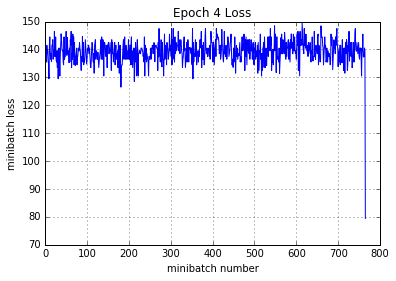

Iteration 3100: with minibatch training loss = 2.13 and accuracy of 0.33
Iteration 3200: with minibatch training loss = 2.21 and accuracy of 0.25
Iteration 3300: with minibatch training loss = 2.15 and accuracy of 0.31
Iteration 3400: with minibatch training loss = 2.18 and accuracy of 0.28
Iteration 3500: with minibatch training loss = 2.27 and accuracy of 0.19
Iteration 3600: with minibatch training loss = 2.23 and accuracy of 0.23
Iteration 3700: with minibatch training loss = 2.18 and accuracy of 0.28
Iteration 3800: with minibatch training loss = 2.21 and accuracy of 0.25
Epoch 5, Overall loss = 2.18 and accuracy of 0.284


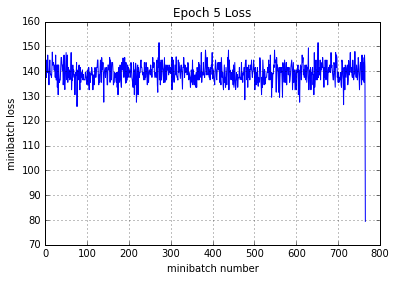

Validation
Epoch 1, Overall loss = 2.19 and accuracy of 0.267


In [4]:
def create_model(l_learning_rate):
    X = tf.placeholder(tf.float32, [None, 3072])
    y = tf.placeholder(tf.int64, [None])
    is_training = tf.placeholder(tf.bool)

    W = tf.Variable(tf.zeros([3072, 10]))
    b = tf.Variable(tf.zeros([10]))

    y_out = tf.nn.softmax(tf.matmul(X, W) + b)

    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=y_out, labels=y)
    mean_loss = tf.reduce_mean(xentropy)

    # define our optimizer
    optimizer = tf.train.AdamOptimizer(l_learning_rate) # select optimizer and set learning rate
    train_op = optimizer.minimize(mean_loss)
    
    return y_out, mean_loss, train_op

def get_k_fold_data(data,label, k, folds = 10):
    fold_sz = len(data)//folds
    
    val_x = data[(k%10)*fold_sz:(1+k%10)*fold_sz, :]
    val_y = label[(k%10)*fold_sz:(1+k%10)*fold_sz]
    
    idxs = range((k%10)*fold_sz)+ range((1+k%10)*fold_sz,len(data))
    tr_x = data[idxs,:]
    tr_y = label[idxs]
    
    return tr_x, tr_y, val_x, val_y

def select_hyper_param(l_batch_sz, l_learning_rate, epoch, x_tr, y_tr, x_te, y_te):
    accu = np.zeros(len(l_batch_sz),len(l_learn_rate))
    
    # 10 fold validation
    fold_k = 10
    fold_idx = -1
    
    for lr in l_learning_rate:
        
        for b_sz in l_batch_sz:
            # 10 fold validation
            fold_idx = (fold_idx+1)%fold_k
            tr_x, tr_y, val_x, val_y = get_k_fold_data(x_tr,y_tr,fold_idx, fold_k)
            
            # create new model with learning rate = lr
            tf.reset_default_graph()
            y_out, mean_loss, train_op = create_model(lr)
            y_ph = tf.placeholder(tf.int64, [None])
            correct_prediction = tf.equal(tf.argmax(y_ph,1), y)
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
            
            # batch number
            b_num = int(math.ceil(tr_x.shape[0]/b_sz))
            
            with tf.Session() as sess:
                sess.run(tf.global_variables_initializer())
                print('Training')
                for e in range(epoch):
                    for b in range(b_num):
                        sess.run(train_op)
                        if (b+1)%100==0:
                            loss = sess.run([mean_loss,accuracy])
                            print("Iteration %d: with minibatch training loss = %.3g and accuracy of %.2g"\
                                  % (b+1, loss, )
                            
        print('Validation')
        run_model(sess,y_out,mean_loss,X_val,y_val,1,64)
                
                
def run_model(session, predict, loss_val, Xd, yd,
              epochs=10, batch_size=64, print_every=100,
              training=None, plot_losses=False):
    # have tensorflow compute accuracy
    correct_prediction = tf.equal(tf.argmax(predict,1), y)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    # shuffle indicies
    train_indicies = np.arange(Xd.shape[0])
    np.random.shuffle(train_indicies)
    
    # training is an operation that update variable list
    training_now = training is not None
    
    # setting up variables we want to compute (and optimizing)
    # if we have a training function, add that to things we compute
    variables = [mean_loss,correct_prediction,accuracy]
    if training_now:
        variables[-1] = training
    
    # counter 
    iter_cnt = 0
    for e in range(epochs):
        # keep track of losses and accuracy
        correct = 0
        losses = []
        # make sure we iterate over the dataset once
        for i in range(int(math.ceil(Xd.shape[0]/batch_size))):
            # generate indicies for the batch
            start_idx = (i*batch_size)%Xd.shape[0]
            idx = train_indicies[start_idx:start_idx+batch_size]
            
            # create a feed dictionary for this batch
            feed_dict = {X: Xd[idx,:],
                         y: yd[idx],
                         is_training: training_now }
            # get batch size
            actual_batch_size = yd[idx].shape[0]
            
            # have tensorflow compute loss and correct predictions
            # and (if given) perform a training step
            loss, corr, _ = session.run(variables,feed_dict=feed_dict)
            
            # aggregate performance stats
            losses.append(loss*actual_batch_size)
            correct += np.sum(corr)
            
            # print every now and then
            if training_now and (iter_cnt % print_every) == 0:
                print("Iteration {0}: with minibatch training loss = {1:.3g} and accuracy of {2:.2g}"\
                      .format(iter_cnt,loss,np.sum(corr)/actual_batch_size))
            iter_cnt += 1
        total_correct = correct/Xd.shape[0]
        total_loss = np.sum(losses)/Xd.shape[0]
        print("Epoch {2}, Overall loss = {0:.3g} and accuracy of {1:.3g}"\
              .format(total_loss,total_correct,e+1))
        if plot_losses:
            plt.plot(losses)
            plt.grid(True)
            plt.title('Epoch {} Loss'.format(e+1))
            plt.xlabel('minibatch number')
            plt.ylabel('minibatch loss')
            plt.show()
    return total_loss,total_correct

with tf.Session() as sess:
    with tf.device("/gpu:0"): #"/cpu:0" or "/gpu:0" 
        sess.run(tf.global_variables_initializer())
        print('Training')
        run_model(sess,y_out,mean_loss,X_train,y_train,5,64,100,train_step,True)
        print('Validation')
        run_model(sess,y_out,mean_loss,X_val,y_val,1,64)